                                             Type2Heart

# Installing the needed package of scikit survival

In [1]:
pip install scikit-survival

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install -U scikit-survival

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


# Importing all needed libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder


from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv

import eli5
from eli5.sklearn import PermutationImportance


from matplotlib.pyplot import figure

# Loading the dataset and doing some required preprocessing on the dataset

In [43]:
s = 'heart_failure_clinical_records_dataset (1).csv' #dataset file
cols = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets','serum_creatinine','serum_sodium','sex', 'smoking','time','DEATH_EVENT_REF','DEATH_EVENT']

#reading in the data from file.
diabetes_data = pd.read_csv(s, sep = ",",header=None,encoding='utf-8',names=cols)
data =  pd.DataFrame(diabetes_data)
# dropping the first row for removing the redundant names of the columns 
diabetes_data=diabetes_data.drop(0) 
data=data.drop(0)
print(data)

    age anaemia creatinine_phosphokinase diabetes ejection_fraction  \
1    75       0                      582        0                20   
2    55       0                     7861        0                38   
3    65       0                      146        0                20   
4    50       1                      111        0                20   
5    65       1                      160        1                20   
..   ..     ...                      ...      ...               ...   
295  62       0                       61        1                38   
296  55       0                     1820        0                38   
297  45       0                     2060        1                60   
298  45       0                     2413        0                38   
299  50       0                      196        0                45   

    high_blood_pressure  platelets serum_creatinine serum_sodium sex smoking  \
1                     1     265000              1.9          130   

# Acquiring all the features for the model

In [44]:
X = diabetes_data.drop(['time','DEATH_EVENT'], axis = 1)
print(X)

    age anaemia creatinine_phosphokinase diabetes ejection_fraction  \
1    75       0                      582        0                20   
2    55       0                     7861        0                38   
3    65       0                      146        0                20   
4    50       1                      111        0                20   
5    65       1                      160        1                20   
..   ..     ...                      ...      ...               ...   
295  62       0                       61        1                38   
296  55       0                     1820        0                38   
297  45       0                     2060        1                60   
298  45       0                     2413        0                38   
299  50       0                      196        0                45   

    high_blood_pressure  platelets serum_creatinine serum_sodium sex smoking  \
1                     1     265000              1.9          130   

# Generating a feature list and transforming feature variable

In [45]:
# all the feature names are stored here for further use.
feature_names =X.columns.tolist() 
print("Feature list of our dataset:",feature_names)
print("\n \n")

# changing the datatype to be fully compatible with scikit-learn
Xt = X.to_numpy()
print("Transformed X datatype to 2-D array")
print(Xt)

Feature list of our dataset: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT_REF']

 

Transformed X datatype to 2-D array
[['75' '0' '582' ... '1' '0' '1']
 ['55' '0' '7861' ... '1' '0' '1']
 ['65' '0' '146' ... '1' '1' '1']
 ...
 ['45' '0' '2060' ... '0' '0' '0']
 ['45' '0' '2413' ... '1' '1' '0']
 ['50' '0' '196' ... '1' '1' '0']]


# Acquiring and preprocessing the Event and 'time to event' variable for the model

In [59]:
y = data['DEATH_EVENT'].to_numpy()
t = data['time'].to_numpy()
#new_t = t[:,0].astype(int)
#type(new_t)

To be fully compatible with scikit-learn, Status and Survival_in_days need to be stored as a structured array with the first field indicating whether the actual survival time was observed or if was censored, and the second field denoting the observed survival time, which corresponds to the time of death (if Status == 'dead', 𝛿=1) or the last time that person was contacted (if Status == 'alive', 𝛿=0).
where  𝛿= an event indicator 𝛿∈{0;1}

In [ ]:
if aux[(aux[298][0]) == 1]:
  S == True
else:
   S == False

In [29]:
integer_map = map(bool,y.all())
integer_list = list(integer_map)
print(integer_list)

[True, True, True]


In [17]:
#List of tuples
y
        
aux = [(e1,e2) for e1,e2 in y]

for e1 in aux:
    e1 = True
 
    
aux

[('1', '4'),
 ('1', '6'),
 ('1', '7'),
 ('1', '7'),
 ('1', '8'),
 ('1', '8'),
 ('1', '10'),
 ('1', '10'),
 ('1', '10'),
 ('1', '10'),
 ('1', '10'),
 ('1', '10'),
 ('1', '11'),
 ('1', '11'),
 ('0', '12'),
 ('1', '13'),
 ('1', '14'),
 ('1', '14'),
 ('1', '15'),
 ('1', '15'),
 ('0', '16'),
 ('1', '20'),
 ('1', '20'),
 ('0', '22'),
 ('1', '23'),
 ('1', '23'),
 ('1', '24'),
 ('1', '26'),
 ('1', '26'),
 ('1', '26'),
 ('1', '27'),
 ('1', '28'),
 ('1', '28'),
 ('0', '29'),
 ('1', '29'),
 ('1', '30'),
 ('1', '30'),
 ('1', '30'),
 ('0', '30'),
 ('1', '30'),
 ('1', '31'),
 ('1', '32'),
 ('1', '33'),
 ('0', '33'),
 ('1', '33'),
 ('1', '35'),
 ('1', '38'),
 ('1', '40'),
 ('1', '41'),
 ('1', '42'),
 ('1', '43'),
 ('1', '43'),
 ('1', '43'),
 ('1', '44'),
 ('1', '45'),
 ('1', '50'),
 ('0', '54'),
 ('0', '54'),
 ('1', '55'),
 ('1', '59'),
 ('1', '60'),
 ('1', '60'),
 ('0', '60'),
 ('1', '61'),
 ('0', '63'),
 ('1', '64'),
 ('1', '65'),
 ('1', '65'),
 ('1', '66'),
 ('1', '67'),
 ('0', '68'),
 ('0', '71')

In [ ]:
def boolu():
   
    for e1,e2 in y:
        if e1 == 1:
            e1 = bool("abc")
        else:
            e1 = bool(False)
        a = (e1,e2)
        return a
    
a

In [63]:
m = np.array(data['DEATH_EVENT_REF'].astype(int))
n = np.array(data['time'].astype(float))

In [65]:
#yz = Surv.from_dataframe('DEATH_EVENT_REF','time',data)
ty= Surv.from_arrays(m,n)
ty

array([( True,   4.), ( True,   6.), ( True,   7.), ( True,   7.),
       ( True,   8.), ( True,   8.), ( True,  10.), ( True,  10.),
       ( True,  10.), ( True,  10.), ( True,  10.), ( True,  10.),
       ( True,  11.), ( True,  11.), (False,  12.), ( True,  13.),
       ( True,  14.), ( True,  14.), ( True,  15.), ( True,  15.),
       (False,  16.), ( True,  20.), ( True,  20.), (False,  22.),
       ( True,  23.), ( True,  23.), ( True,  24.), ( True,  26.),
       ( True,  26.), ( True,  26.), ( True,  27.), ( True,  28.),
       ( True,  28.), (False,  29.), ( True,  29.), ( True,  30.),
       ( True,  30.), ( True,  30.), (False,  30.), ( True,  30.),
       ( True,  31.), ( True,  32.), ( True,  33.), (False,  33.),
       ( True,  33.), ( True,  35.), ( True,  38.), ( True,  40.),
       ( True,  41.), ( True,  42.), ( True,  43.), ( True,  43.),
       ( True,  43.), ( True,  44.), ( True,  45.), ( True,  50.),
       (False,  54.), (False,  54.), ( True,  55.), ( True,  5

In [27]:
#List of tuples
aux = [(e1,e2) for e1,e2 in y]


#Structured array
new_data_y = np.array(aux,dtype=[('Status', '?'), ('Survival_in_days', '<f8')])

new_data_y


array([( True,   4.), ( True,   6.), ( True,   7.), ( True,   7.),
       ( True,   8.), ( True,   8.), ( True,  10.), ( True,  10.),
       ( True,  10.), ( True,  10.), ( True,  10.), ( True,  10.),
       ( True,  11.), ( True,  11.), ( True,  12.), ( True,  13.),
       ( True,  14.), ( True,  14.), ( True,  15.), ( True,  15.),
       ( True,  16.), ( True,  20.), ( True,  20.), ( True,  22.),
       ( True,  23.), ( True,  23.), ( True,  24.), ( True,  26.),
       ( True,  26.), ( True,  26.), ( True,  27.), ( True,  28.),
       ( True,  28.), ( True,  29.), ( True,  29.), ( True,  30.),
       ( True,  30.), ( True,  30.), ( True,  30.), ( True,  30.),
       ( True,  31.), ( True,  32.), ( True,  33.), ( True,  33.),
       ( True,  33.), ( True,  35.), ( True,  38.), ( True,  40.),
       ( True,  41.), ( True,  42.), ( True,  43.), ( True,  43.),
       ( True,  43.), ( True,  44.), ( True,  45.), ( True,  50.),
       ( True,  54.), ( True,  54.), ( True,  55.), ( True,  5

# Spliting the dataset 90% for training and 10% for testing so we can determine how well our model generalizes.

In [66]:
random_state = 13

X_train, X_test, y_train, y_test = train_test_split(
    Xt, ty, test_size=0.10, random_state=random_state)
y_test

array([(False, 237.), (False,  94.), (False, 186.), (False,  75.),
       ( True,  27.), ( True,  77.), ( True,  43.), ( True,  60.),
       ( True,  55.), (False, 230.), (False, 205.), (False, 145.),
       (False, 121.), ( True,  11.), ( True,  11.), (False, 192.),
       (False, 214.), (False, 271.), (False, 146.), (False, 175.),
       (False,  74.), (False, 250.), (False, 146.), ( True,  10.),
       (False, 244.), (False, 104.), (False, 246.), ( True,  29.),
       (False, 194.), (False,  85.)],
      dtype=[('event', '?'), ('time', '<f8')])

# Training the Model using the training data, we fit a Random Survival Forest comprising 240 trees.

In [67]:
rsf = RandomSurvivalForest(n_estimators=240, #240
                           min_samples_split=150, #139
                           min_samples_leaf=1,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=random_state)
rsf.fit(X_train, y_train)

RandomSurvivalForest(max_features='sqrt', min_samples_leaf=1,
                     min_samples_split=150, n_estimators=240, n_jobs=-1,
                     random_state=13)

# Checking how well the model performs by evaluating it on the test data.

W are using generalization of the area under the receiver operating characteristic (ROC) curve called Harrell’s concordance index or c-index.

The interpretation is identical to the traditional area under the ROC curve metric for binary classification: - a value of 0.5 denotes a random model, - a value of 1.0 denotes a perfect model, - a value of 0.0 denotes a perfectly wrong model.

In [68]:


print("The  concordance index for the model on this data turns out to be:")
rsf.score(X_test, y_test)

The  concordance index for the model on this data turns out to be:


0.9099099099099099

# Predicting

For prediction, a sample is dropped down each tree in the forest until it reaches a terminal node. Data in each terminal is used to non-parametrically estimate the survival and cumulative hazard function using the Kaplan-Meier and Nelson-Aalen estimator, respectively. In addition, a risk score is being computed that represents the expected number of events for one particular terminal node. The ensemble prediction is simply the average across all trees in the forest.

In [69]:
#Creating a new array of given shape and type,from the test data 
#according to the people having diabetes and age of the patient
a = np.empty(X_test.shape[0], dtype=[("diabetes", float), ("high_blood_pressure", float)])
a["diabetes"] = X_test[:, 3]
a["high_blood_pressure"] = X_test[:, 5]


# Sorting the array we created above and keeping diabetes and  high_blood_pressure fields to be compared first
sort_idx = np.argsort(a, order=["diabetes", "high_blood_pressure"])

# Creating a dataframe from the sorted array for getting 
# risk_score of first three and last three sorted entries of the array.
# We use the feature_names for the created dataframe from our dataset only.
#X_test_sel = pd.DataFrame(X_test[np.concatenate((sort_idx[:3], sort_idx[-3:]))],columns=feature_names)
X_test_sel = pd.DataFrame(X_test[:],columns=feature_names)
#X_test_sel = pd.DataFrame(X_test[np.concatenate((sort_idx[0:20], sort_idx[0:1]))],columns=feature_names)
X_test_sel

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT_REF
0,68,1,157,1,60,0,208000,1,140,0,0,0
1,65,1,113,1,60,1,203000,0.9,140,0,0,0
2,65,0,167,0,30,0,259000,0.8,138,0,0,0
3,70,0,69,0,40,0,293000,1.7,136,0,0,0
4,94,0,582,1,38,1,263358.03,1.83,134,1,0,1
5,60,1,76,1,25,0,196000,2.5,132,0,0,1
6,53,1,91,0,20,1,418000,1.4,139,0,0,1
7,50,0,318,0,40,1,216000,2.3,131,0,0,1
8,49,0,789,0,20,1,319000,1.1,136,1,1,1
9,58,0,132,1,38,1,253000,1,139,1,0,0


# Predicting WDC-MATH risk score

The predicted risk scores indicate that risk for the last three patients is quite a bit higher than that of the first three patients.

In [70]:
"""
Using the rsf predict function we get our scores and we transform the score to Pandas Series 
that is a one-dimensional labeled array capable of holding data of any type
"""

WDCMATH_risk_score = pd.Series(rsf.predict(X_test_sel))
print(WDCMATH_risk_score)

0      7.023247
1      7.191897
2      6.710446
3      7.554448
4     51.849335
5     45.207058
6     40.980019
7     44.688962
8     40.558026
9      6.861444
10     8.882763
11     7.454548
12    14.105058
13    37.062340
14    37.364025
15     7.130750
16     7.917086
17     6.485628
18     6.718699
19     8.069967
20     6.947519
21     6.668190
22     7.349436
23    47.489092
24     6.496390
25     7.128484
26     6.748385
27    36.954319
28     7.859626
29     7.003118
dtype: float64


We can have a more detailed insight by considering the predicted survival function. It shows that the biggest difference occurs roughly within the first 125 days.
The patient labelled 3 is being an exception because of the values of age, diabetes and high blood pressure and is likely on greater risk as compared to other patients in the dataset.

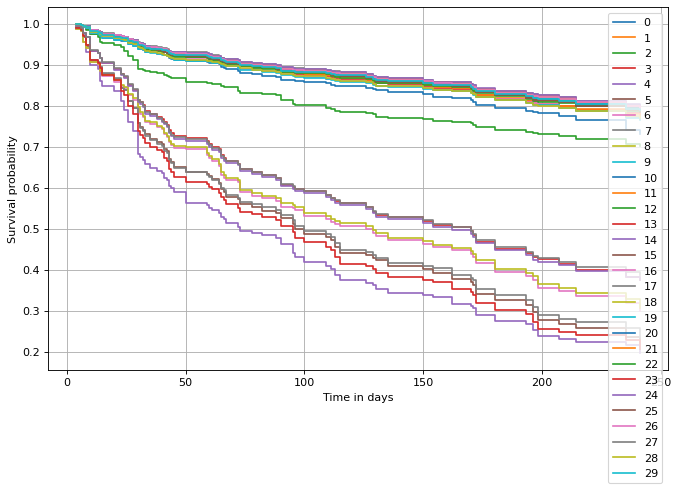

In [71]:
# Using the survival analysis function to visualize  
#when change occured in Y-axis value exactly with respect to X-axis
surv = rsf.predict_survival_function(X_test_sel, return_array=True)


figure(figsize=(10,6), dpi=80)

# Plotting a step function graph to analyze at which points the change in
#Survival probability value has occurred exactly with respect to Time in days.
for i, s in enumerate(surv):
    plt.step(rsf.event_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)


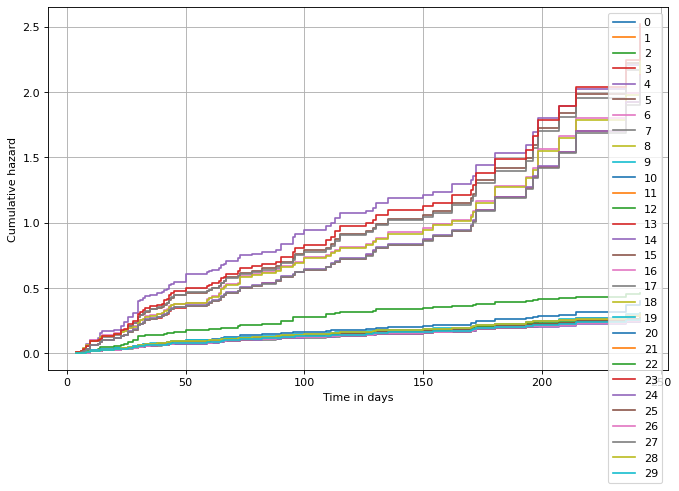

In [72]:
# Using the cumulative hazard function to visualize 
#  the measure of the total amount of risk that has been accumulated up to time t" 
surv = rsf.predict_cumulative_hazard_function(X_test_sel, return_array=True)


figure(figsize=(10,6), dpi=80)

# Plotting a step function graph to analyze at which points the change in
#Survival probability value has occurred exactly with respect to Time in days.
for i, s in enumerate(surv):
    plt.step(rsf.event_times_, s, where="post", label=str(i))
plt.ylabel("Cumulative hazard")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)

# Permutation-based Feature Importance

When interpreting Permutation importances the values towards the top are the most important features in the table below, and those towards the bottom matter least.
The result shows that the high blood pressure is by far the most important feature. If its relationship to survival time is removed (by random shuffling), the concordance index on the test data drops on average by 0.1193 points.

In [73]:
"""
The first number in each row  of the table below shows how much
model performance decreased with a random shuffling which is being 
done by PermutationImportance function. The number after the ± measures 
how performance varied from one-reshuffling to the next.
"""

perm = PermutationImportance(rsf, n_iter=15, random_state=random_state)
perm.fit(X_test, y_test)
eli5.show_weights(perm, feature_names=feature_names)

Weight,Feature
0.3126 ± 0.1591,DEATH_EVENT_REF
0.0045 ± 0.0074,anaemia
0.0030 ± 0.0188,age
0.0015 ± 0.0097,serum_sodium
0.0003 ± 0.0022,platelets
0.0003 ± 0.0022,creatinine_phosphokinase
0 ± 0.0000,smoking
0 ± 0.0000,sex
0 ± 0.0000,high_blood_pressure
0 ± 0.0000,diabetes


                                      Thank you Wonjun Sir.